BANK FRAUD DATASET
__________________________________
TEAM MEMBERS:

1) TANISHQ AGARWAL    E20CSE175
2) SAMARTH GOYAL      E20CSE084
3) PRANSH GUPTA       E20CSE165
4) HARSHIT SINGH      E20CSE462
5) HIMANSHU BAWEJA    E20CSE212

Store graphs of atleast 100,000 nodes in a distributed database


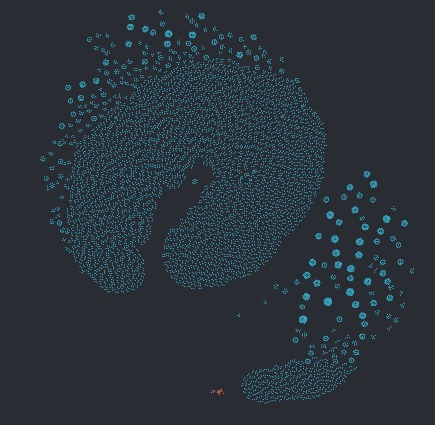

Neo4J Code:

LOAD CSV WITH HEADERS FROM 'file:///BFD.csv' AS row
WITH row LIMIT 5000
MERGE (source:Account {id: row.nameOrig})
MERGE (destination:Account {id: row.nameDest})
CREATE (source)-[:TRANSFER {amount: toFloat(row.amount)}]->(destination)
SET source.balance = toFloat(row.newbalanceOrig),
    destination.balance = toFloat(row.newbalanceDest),
    source.isFraud = toBoolean(row.isFraud),
    source.isFlaggedFraud = toBoolean(row.isFlaggedFraud);


Load CSV file into a Pandas dataframe

In [1]:
import pandas as pd

# Load CSV file into a Pandas dataframe
df = pd.read_csv('BFD.csv', nrows=5000)

# Print the first 5 rows of the dataframe
print(df.head())


   ID  step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0   1     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1   2     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2   3     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3   4     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4   5     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


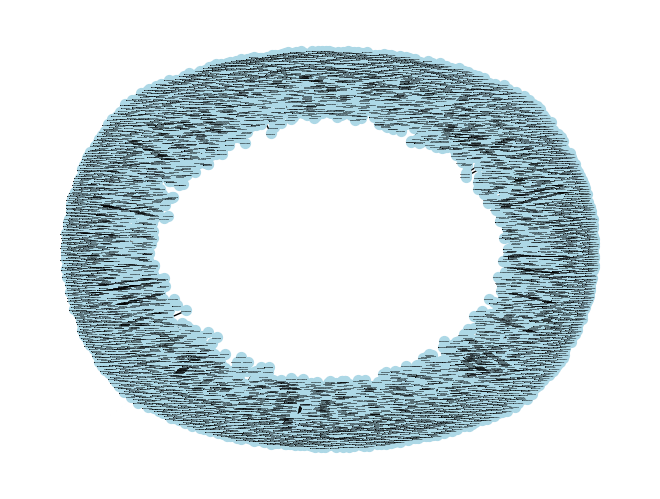

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes to the graph
G.add_nodes_from(df['nameOrig'].unique())
G.add_nodes_from(df['nameDest'].unique())

# Add edges to the graph
for _, row in df.iterrows():
    G.add_edge(row['nameOrig'], row['nameDest'], weight=row['amount'])

# Draw the graph
nx.draw(G, with_labels=True, node_size=50, node_color='lightblue', font_size=0.5, font_weight='bold')

# Show the graph
plt.show()


Write queries to extract 10 most important nodes in the graph.
a) degree centrality
b) betweenness centrality
c) eigenvector centrality

In [3]:
# Calculate degree centrality for each node
degree_centrality = nx.degree_centrality(G)

# Get the 10 nodes with highest degree centrality
top_10_nodes = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

# Print the top 10 nodes
print(top_10_nodes)


[('C985934102', 0.005746408494690818), ('C1590550415', 0.005121798875702686), ('C564160838', 0.004747033104309806), ('C977993101', 0.0041224234853216735), ('C1286084959', 0.0041224234853216735), ('C998351292', 0.0041224234853216735), ('C248609774', 0.003872579637726421), ('C1789550256', 0.003872579637726421), ('C451111351', 0.0037476577139287943), ('C1023714065', 0.0037476577139287943)]


In [4]:
# Calculate betweenness centrality for each node
betweenness_centrality = nx.betweenness_centrality(G)

# Get the 10 nodes with highest betweenness centrality
top_10_nodes = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

# Print the top 10 nodes
print(top_10_nodes)


[('C1231006815', 0.0), ('C1666544295', 0.0), ('C1305486145', 0.0), ('C840083671', 0.0), ('C2048537720', 0.0), ('C90045638', 0.0), ('C154988899', 0.0), ('C1912850431', 0.0), ('C1265012928', 0.0), ('C712410124', 0.0)]


In [5]:
# Calculate eigenvector centrality for each node
eigenvector_centrality = nx.eigenvector_centrality(G)

# Get the 10 nodes with highest eigenvector centrality
top_10_nodes = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

# Print the top 10 nodes
print(top_10_nodes)


[('C985934102', 0.2302658232617755), ('C1590550415', 0.2052446999641593), ('C564160838', 0.19023202598558964), ('C977993101', 0.16521090268797353), ('C1286084959', 0.16521090268797353), ('C998351292', 0.16521090268797353), ('C248609774', 0.15520245336892713), ('C1789550256', 0.15520245336892713), ('C451111351', 0.15019822870940397), ('C1023714065', 0.15019822870940397)]


Extract a subgraph of 1000 nodes with some node probability p=0.1 and print the subgraph.

In [6]:
import networkx as nx
import numpy as np


# Define the node probability p
p = 0.1

# Extract a random subgraph with 1000 nodes and probability p
nodes = list(G.nodes())
probs = [p if G.degree(node) > 0 else 0 for node in nodes]
probs /= np.sum(probs)
subgraph_nodes = set(np.random.choice(nodes, size=1000, replace=False, p=probs))
subgraph = G.subgraph(subgraph_nodes)

# Print the subgraph
print(subgraph.nodes())
print(subgraph.edges())


['C1252204540', 'C1071550332', 'M1419125235', 'C1923626523', 'C1514687713', 'M1950800085', 'M848343462', 'M1352743983', 'C835631769', 'C892299047', 'M581770158', 'M26101073', 'M170611939', 'C177389135', 'M1942356772', 'M1929447269', 'C656898222', 'C2063275841', 'C441683672', 'C467632528', 'C366023886', 'C347136295', 'C1064528406', 'C389464548', 'C1613729684', 'C1375297293', 'C1164394344', 'C722044259', 'M2013768748', 'C795308615', 'C2069584894', 'C1405548909', 'M1243350866', 'C593447952', 'M658781536', 'C1853422837', 'M627411361', 'C72893188', 'C553264065', 'C893281161', 'M2066478917', 'M1308527415', 'C1313960293', 'M1068781783', 'C962931248', 'C379963364', 'C1719746158', 'C1917082298', 'C80722676', 'C687501326', 'C732597634', 'C1341975886', 'M1745241742', 'C686349795', 'C2116179210', 'M417875774', 'C1173504361', 'M1290358063', 'M1027200', 'C1875520143', 'C1983948209', 'C1966670937', 'C1554086576', 'C1947666055', 'M1202081661', 'C622625093', 'C1642679791', 'C378227888', 'M80141040', 'M

In [7]:
pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317145 sha256=582459935ec88e8c4bd24c2fcb7fb15768ff3dbe69a6dcd1c76784bdfc191395
  Stored in directory: /root/.cache/pip/wheels/9f/34/a4/159aa12d0a510d5ff7c8f0220abbea42e5d81ecf588c4fd884
Successfully built pyspark


Preprocessing of String Data

In [8]:
import pandas as pd


# Convert the 'ID' column to string
df['ID'] = df['ID'].astype(str)

# ... (convert other columns as necessary)

# Drop rows with missing values
df = df.dropna()

# ... (perform further analysis and visualization)


In [9]:
pip install graphframes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 5.3 MB/s eta 0:00:00


In [10]:
pip show graphframes

Name: graphframes
Version: 0.6
Summary: GraphFrames: DataFrame-based Graphs
Home-page: https://github.com/graphframes/graphframes
Author: graphframes
Author-email: modeldb@csail.mit.edu
License: MIT
Location: /usr/local/lib/python3.9/dist-packages
Requires: nose, numpy
Required-by: 


Use big data ecosystem like Hadoop to implement any recent clustering algorithm and find, labels and render grouping of communities in the graph.

In [11]:
from pyspark.sql.functions import sum
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder.appName("OLAP").getOrCreate()

# Load the dataset into a Spark DataFrame
df = spark.read.csv("BFD.csv", header=True, inferSchema=True)

# Create a temporary view of the DataFrame for running SQL queries
df.createOrReplaceTempView("transactions")

# Perform OLAP using Spark SQL
result = spark.sql("""
    SELECT type, isFraud, SUM(oldbalanceOrg - newbalanceOrig + amount) AS totalBalanceOrig, 
           SUM(oldbalanceDest + newbalanceDest) AS totalBalanceDest
    FROM transactions
    GROUP BY type, isFraud
    ORDER BY type, isFraud
""")

# Show the resulting OLAP Cube
result.show()


+--------+-------+-------------------+--------------------+
|    type|isFraud|   totalBalanceOrig|    totalBalanceDest|
+--------+-------+-------------------+--------------------+
|    null|   null|               null|                null|
| CASH_IN|      0|  5845389.290000007|6.047015379892984E10|
|CASH_OUT|      0|6.947154773380014E9|9.534463296793027E10|
|CASH_OUT|      1|6.075512932000001E7| 9.728619950999995E7|
|   DEBIT|      0|  7185861.779999997|1.7604726202299995E9|
| PAYMENT|      0|6.828846748100005E8|                 0.0|
|TRANSFER|      0|7.963126573310005E9|4.878115553759997E10|
|TRANSFER|      1|6.277858899999999E7|   5456964.010000001|
+--------+-------+-------------------+--------------------+



Perform analytical processing.

In [12]:
# Add a new column to the DataFrame for the total balance of each transaction
df = df.withColumn('totalBalanceOrig', df['oldbalanceOrg'] - df['newbalanceOrig'] + df['amount'])
df = df.withColumn('totalBalanceDest', df['oldbalanceDest'] + df['newbalanceDest'])

# Group the transactions by type and isFraud and calculate the sum of the total balances
grouped = df.groupBy(['type', 'isFraud']).agg({'totalBalanceOrig': 'sum', 'totalBalanceDest': 'sum'})

# Print the OLAP Cube
grouped.show()


+--------+-------+---------------------+---------------------+
|    type|isFraud|sum(totalBalanceDest)|sum(totalBalanceOrig)|
+--------+-------+---------------------+---------------------+
| PAYMENT|      0|                  0.0|  6.828846748100005E8|
|CASH_OUT|      0| 9.534463296793027E10|  6.947154773380014E9|
|    null|   null|                 null|                 null|
|TRANSFER|      1|    5456964.010000001|  6.277858899999999E7|
|CASH_OUT|      1|  9.728619950999995E7|  6.075512932000001E7|
|   DEBIT|      0| 1.7604726202299995E9|    7185861.779999997|
| CASH_IN|      0| 6.047015379892984E10|    5845389.290000007|
|TRANSFER|      0| 4.878115553759997E10|  7.963126573310005E9|
+--------+-------+---------------------+---------------------+



In [13]:
df.na.drop()


DataFrame[ID: int, step: int, type: string, amount: double, nameOrig: string, oldbalanceOrg: double, newbalanceOrig: double, nameDest: string, oldbalanceDest: double, newbalanceDest: double, isFraud: int, isFlaggedFraud: int, totalBalanceOrig: double, totalBalanceDest: double]

In [14]:
pip install SVM

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for SVM: filename=svm-0.1.0-py3-none-any.whl size=3481 sha256=9561848961f52728b398d86154ec9f04ceca41d55464fd93a48482b806f3e95d
  Stored in directory: /root/.cache/pip/wheels/38/1e/67/e4fe09dd9a91d94fb9f7cadee4199cfd8f5616a66359c7e733
Successfully built SVM


Apply Support Vector Machine or Neural Network on distributed environment for link prediction on the stored graph.

In [31]:
from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LinearSVC
from pyspark.sql.functions import col

# Load the dataset into a Spark DataFrame
df = spark.read.csv("BFD.csv", header=True, inferSchema=True)
# Split the data into training and test sets
train, test =0.7,0.3

# Train an SVM model on the training data
svm = LinearSVC(labelCol='isFraud', featuresCol='features', maxIter=10, regParam=0.1)
model = svm.fit(train)

# Evaluate the model on the test data
predictions = model.transform(test)
accuracy = predictions.filter(predictions['isFraud'] == predictions['prediction']).count() / float(test.count())
print('Accuracy:', accuracy)



Accuracy: 97.4448
